# Basic Statistics in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np          # Handles heavy mathematical calcuations
import pandas as pd         # Data manager, allowing us to work with structured data using "DataFrames"
import seaborn as sb        # Designer on top matplotlib to make graphs look better and easier to create
import matplotlib as mt     
import matplotlib.pyplot as plt # we only need pyplot --> "Artist", draws lines and shapes for graphs
sb.set() # set the default Seaborn style for graphics

In [3]:
# Print library package version
print("Seaborn version = "+sb.__version__)
print("matplotlib version = "+mt.__version__)

Seaborn version = 0.13.2
matplotlib version = 3.10.3


---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [4]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head() # Never assume data is loaded correctly --> Let's peek at the first 5 rows to verify headers and data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [5]:
print("Data type : ", type(pkmndata))   # Confirm we are working with a Pandas DataFrame
print("Data dims : ", pkmndata.shape)   # How many Pokemon (800), and how many attributes for each one (13)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [6]:
"""
dtypes: data types
int64   : integers (Hp, Attack, etc.)
object  : usually text/strings
bool    : True/False
"""
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

### Extract a Single Variable

We will start by analyzing a single variable from the dataset, **HP**.  
This variable tells us defines how much damage a Pokemon can withstand.  
Extract the variable and its associated data as a Pandas `DataFrame`.

In [7]:
hp = pd.DataFrame(pkmndata['HP'])   # Isolating the "HP" column to study it specifically
print("Data type : ", type(hp))
print("Data dims : ", hp.size)
hp.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  800


,HP
0,45
1,60
2,80
3,80
4,39


---

### Uni-Variate Statistics

Check the Summary Statistics of Uni-Variate Series using `describe`.

In [8]:
"""
.describe() generates the standard summary
    Count
    Mean
    Std (Standard Deviation)
    Min/Max
    25%/50%/75% (Quartiles)
"""
hp.describe()

,HP
count,800.000000
mean,69.258750
std,25.534669
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


Check the Summary Statistics visually using a standard `boxplot`.

Boxplots are perfect for spotting **Outliers** and seeing the **Interquartile Range** (IR), which is (Q3 - Q1)

**Anatomy:**
* **Box**: Represents the middle 50% of the data (from 25th (Q1) to 75th (Q3) percentile)
* **Line in the middle**: Median
* **Whiskers**: Range of 'normal' data. (Q1 - 1.5IR | Q3 + 1.5IR)
* **Dots**: Outliers, points that are beyond 1.5x value of LQ/UQ

<Axes: >

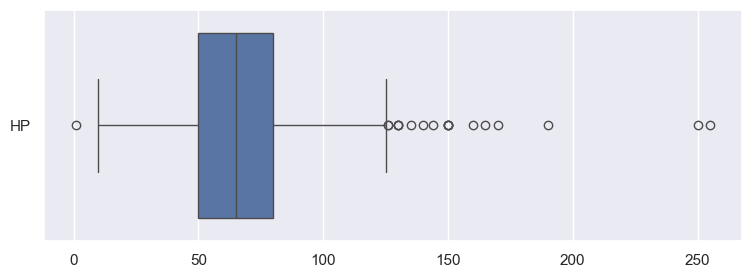

In [28]:
f = plt.figure(figsize=(9, 3))
sb.boxplot(data = hp, orient = "h")

Extend the summary to visualize the complete distribution of the Series.  
The first visualization is a simple Histogram with automatic bin sizes.

<Axes: ylabel='Count'>

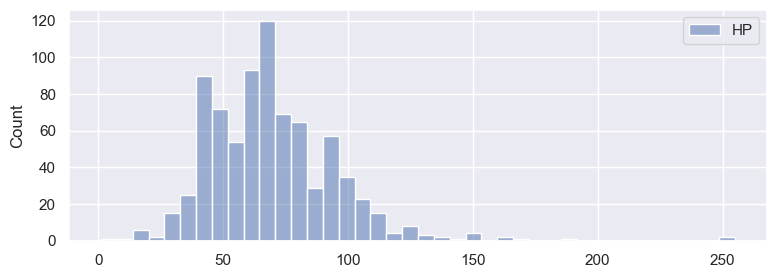

In [33]:
"""
We use Histograms to visualize the Frequency Distribution
It chops data into 'bins' (e.g., HP 0-10, 10-20) and counts how many fall into each bin
"""
f = plt.figure(figsize=(9, 3))
sb.histplot(data = hp)

The second visualization is a simple Kernel Density Estimate (KDE).

<Axes: ylabel='Density'>

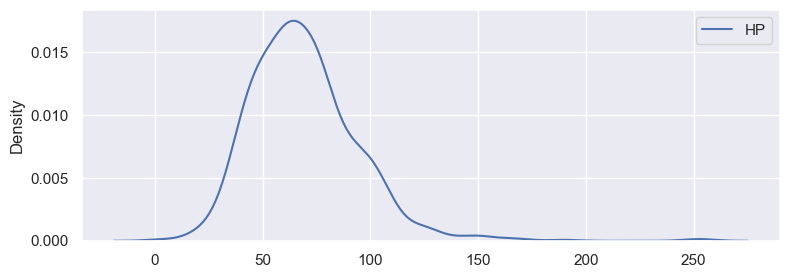

In [32]:
"""
Think of this as a smoothed histogram --> estimates the probability of a data point occuring
Useful for seeing the shape of the distribution without the "block" nature of histograms
"""
f = plt.figure(figsize=(9, 3))
sb.kdeplot(data = hp)

You may also want a combination of the two, `hist` and `kde`, as follows.

<Axes: ylabel='Count'>

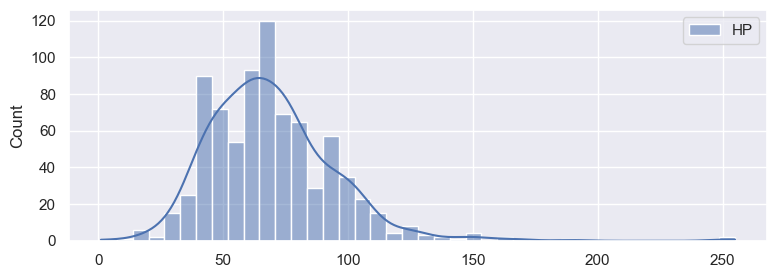

In [31]:
"""
Bars: Show actual counts (reality)
Line: Shows the trend/shape (theory)
"""
f = plt.figure(figsize=(9, 3))
sb.histplot(data = hp, kde = True)

Finally, the **Violin Plot** combines boxplot with kernel density estimate.

"\nWhen to use what? Up to you really. \n\nBoxplots --> Hide the shape, showing summary statistics (Quartiles), can't tell you if the data is bimodal (two peaks)\nViolin --> Show the shape, if the data is bimodal, it would be something like a dumbell\n\nViolin plots can be generally harder for non-technical readers or beginners to appreciate (compared to a simple histogram)\n\nMy opinion:\n    Use a boxplot when you want to quickly see outliers and median etc.\n    Use a violin when you want to see the nuance of the data distribution (density)\n        while still keeping summary statistics visible\n"

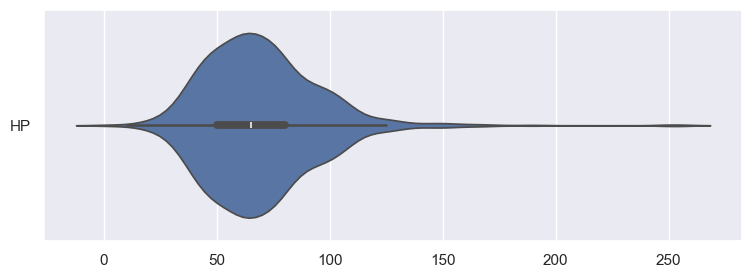

In [ ]:
"""
The White Dot: The Median (The exact middle Pokemon).

The Thick Black Bar: The Interquartile Range (The middle 50% of Pokemon).

The "Violin" Shape: The Density (KDE).
   - The wider the violin, the more Pokemon exist at that HP level.
   - The thinner the violin, the fewer Pokemon exist there.
"""
f = plt.figure(figsize=(9, 3))
sb.violinplot(data = hp, orient = "h")

"""
When to use what? Up to you really. 

Boxplots ("Summary"):
   - Pros: Standardized, easy to read, clearly highlights Outliers (dots).
   - Cons: Hides the "shape." You can't tell if data is bimodal (has two peaks/humps).
   
Violin Plots ("Deep Dive"):
   - Pros: Reveals the true shape/nuance of the data (e.g., is the data clustered in two groups?).
   - Cons: Can be confusing for non-technical audiences.

Violin plots can be generally harder for non-technical readers or beginners to appreciate (compared to a simple histogram)

My opinion:
    - Use Boxplots for a quick summary.
    - Use Violins for analysis.
"""

---

### Extract Two Variables

Next, we will analyze two variables from the dataset, **HP** vs **Attack**.  
Extract the two variables and their associated data as a Pandas `DataFrame`.

In [14]:
hp = pd.DataFrame(pkmndata['HP'])
attack = pd.DataFrame(pkmndata['Attack'])

---

### Bi-Variate Statistics

We can of course check the uni-variate Summary Statistics for each variable.

In [15]:
# Summary Statistics for HP
hp.describe()

,HP
count,800.000000
mean,69.258750
std,25.534669
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


In [16]:
# Summary Statistics for Attack
attack.describe()

,Attack
count,800.000000
mean,79.001250
std,32.457366
min,5.000000
25%,55.000000
50%,75.000000
75%,100.000000
max,190.000000


And visualize the uni-variate Distributions of each variable independently.

<Axes: >

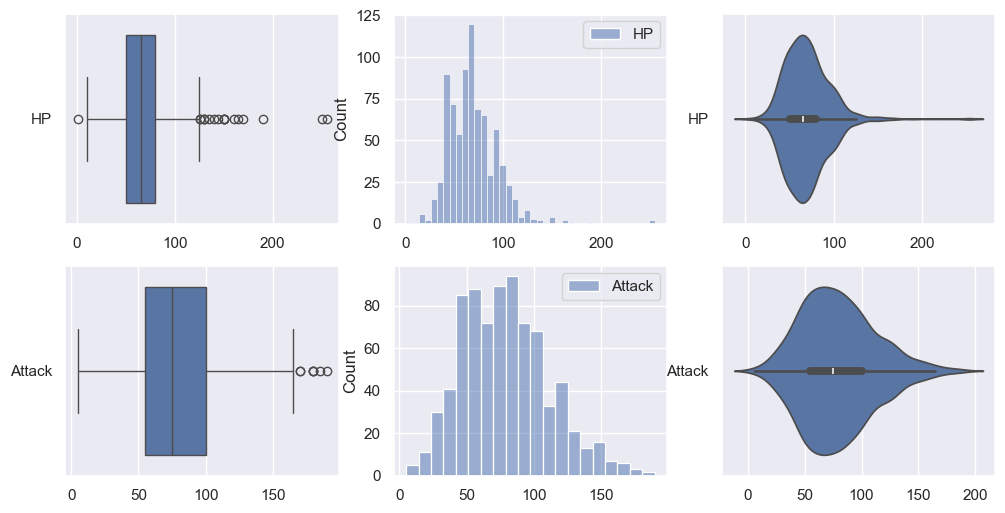

In [35]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(12, 6))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = hp, orient = "h", ax = axes[0,0])
sb.histplot(data = hp, ax = axes[0,1])
sb.violinplot(data = hp, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = attack, orient = "h", ax = axes[1,0])
sb.histplot(data = attack, ax = axes[1,1])
sb.violinplot(data = attack, orient = "h", ax = axes[1,2])

However, it will be more interesting to visualize them together in a `jointplot`.

In [18]:
# Create a joint dataframe by concatenating the two variables
# axis = 1 stacks them side-by-side --> making a wider table
# reindex is a safety measure to make sure all rows line up perfectly
jointDF = pd.concat([attack, hp], axis = 1).reindex(attack.index)
jointDF

,Attack,HP
0,49,45
1,62,60
2,82,80
3,100,80
4,52,39
...,...,...
795,100,50
796,160,50
797,110,80
798,160,80


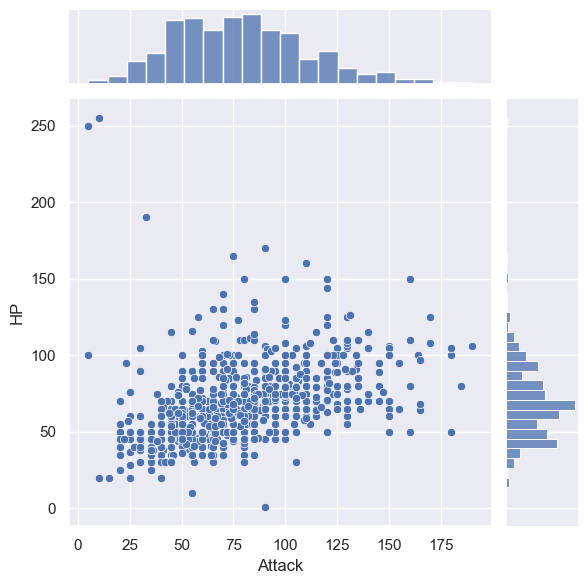

In [36]:
"""
Joint plot of HP against Attack
    Default is a scatterplot in the center (showing the correlation),
    and marginals (histograms/KDE) on the side (just HP/Attk individually)

The core takeaway
    Uni-variate (one variable) tells us how the data looks like
    Bi-variat (two variables) tells us how the data interacts
"""

# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "Attack", y = "HP", height = 6)

As it tells us something about the **Correlation** between the two variables.

In [20]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

"""
.corr() generates the Pearson COrrelation Coefficient

Scale (-1 to +1)
    +1.0 --> Perfect Positive Correlation (If A up, B up)
    0.0  --> No Correlation (Random noise)
    -1.0 --> Perfect Negative Correlation (If A up, B down)
"""

'\n.corr() generates the Pearson COrrelation Coefficient\n\nScale (-1 to +1)\n    +1.0 --> Perfect Positive Correlation (If A up, B up)\n    0.0  --> No Correlation (Random noise)\n    -1.0 --> Perfect Negative Correlation (If A up, B down)\n'

One may visualize the correlation matrix as a `heatmap` to gain a better insight.

'\nHow to analyse? \n    0.42 suggests a moderate positive relationship\n    --> Pkmn with high ATK have high HP, but not a strict rule\n\nScatter plot gave us the "messy" real data, correlation matrix gives us the raw score,\nHeatmap gives us the visualization (easy to present)\n'

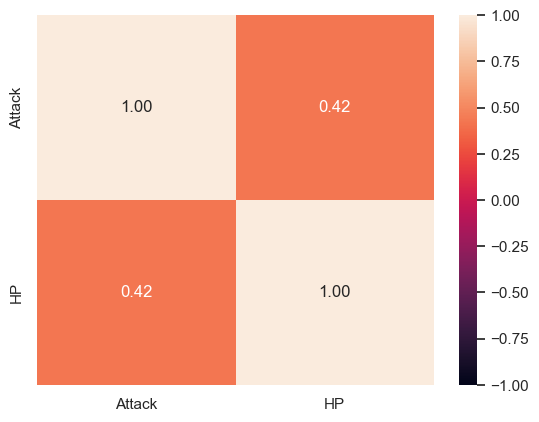

In [21]:
"""
Heatmap --> Using colours to show intensity
vmin/vmax --> force the boundaries of the plot
annot --> write the number in the box
fmt --> format 2 decimal places (float)
"""
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

"""
How to analyse? 
    0.42 suggests a moderate positive relationship
    --> Pkmn with high ATK have high HP, but not a strict rule

Scatter plot gave us the "messy" real data, correlation matrix gives us the raw score,
Heatmap gives us the visualization (easy to present)
"""

---

### Multi-Variate Statistics

Similarly, we may analyze all numeric values in the original dataset.

In [22]:
# Extract only the numeric data variables
numDF = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Summary Statistics for all Variables
numDF.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


<Axes: >

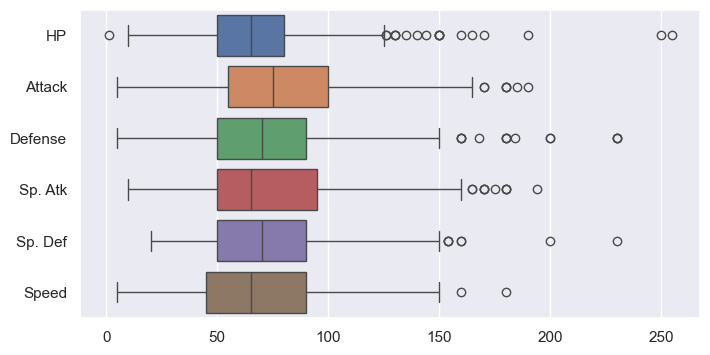

In [37]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(8, 4))
sb.boxplot(data = numDF, orient = "h")

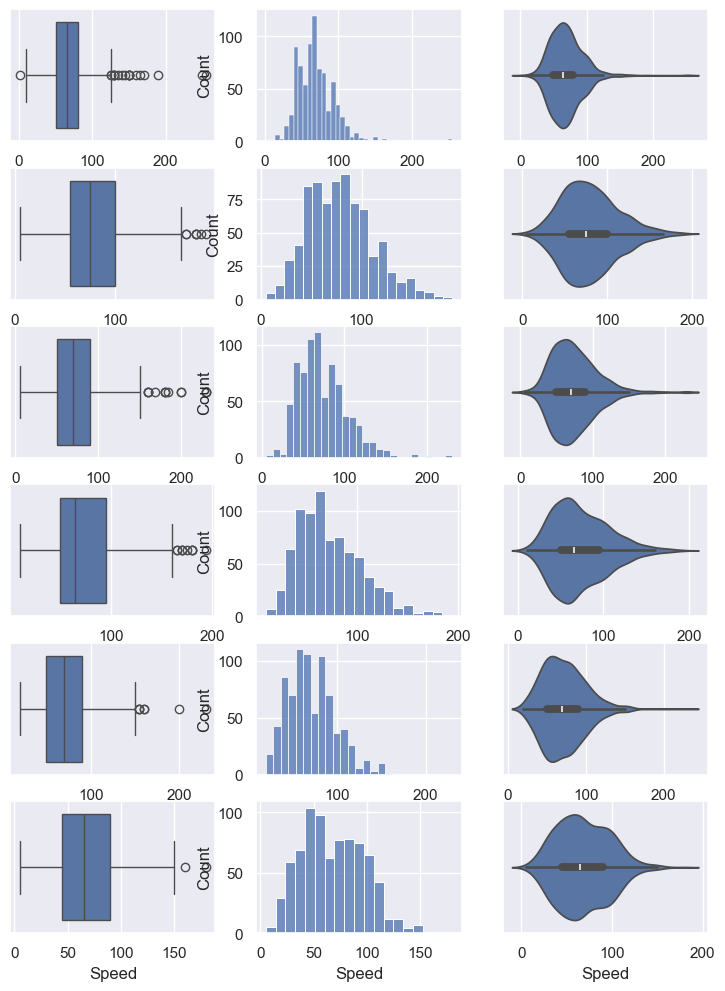

In [38]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(9, 12))

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

In [25]:
# Calculate the complete  correlation matrix
numDF.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


<Axes: >

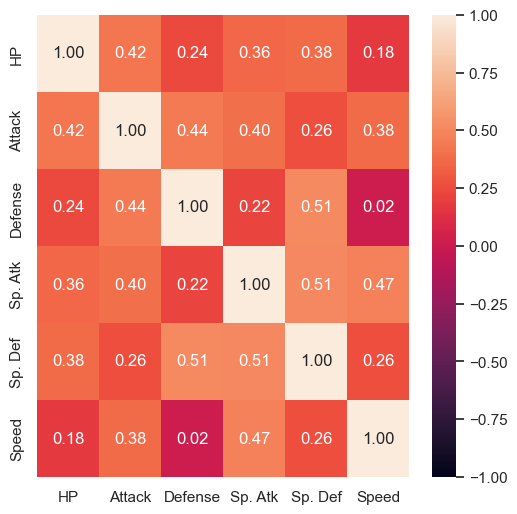

In [39]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(6, 6))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

'\nOne line to create a matrix of plots \n    Diagonal: Univariate distribution of specific variable\n    Off-Diagonal: Scatter lots between row and column variables\n'

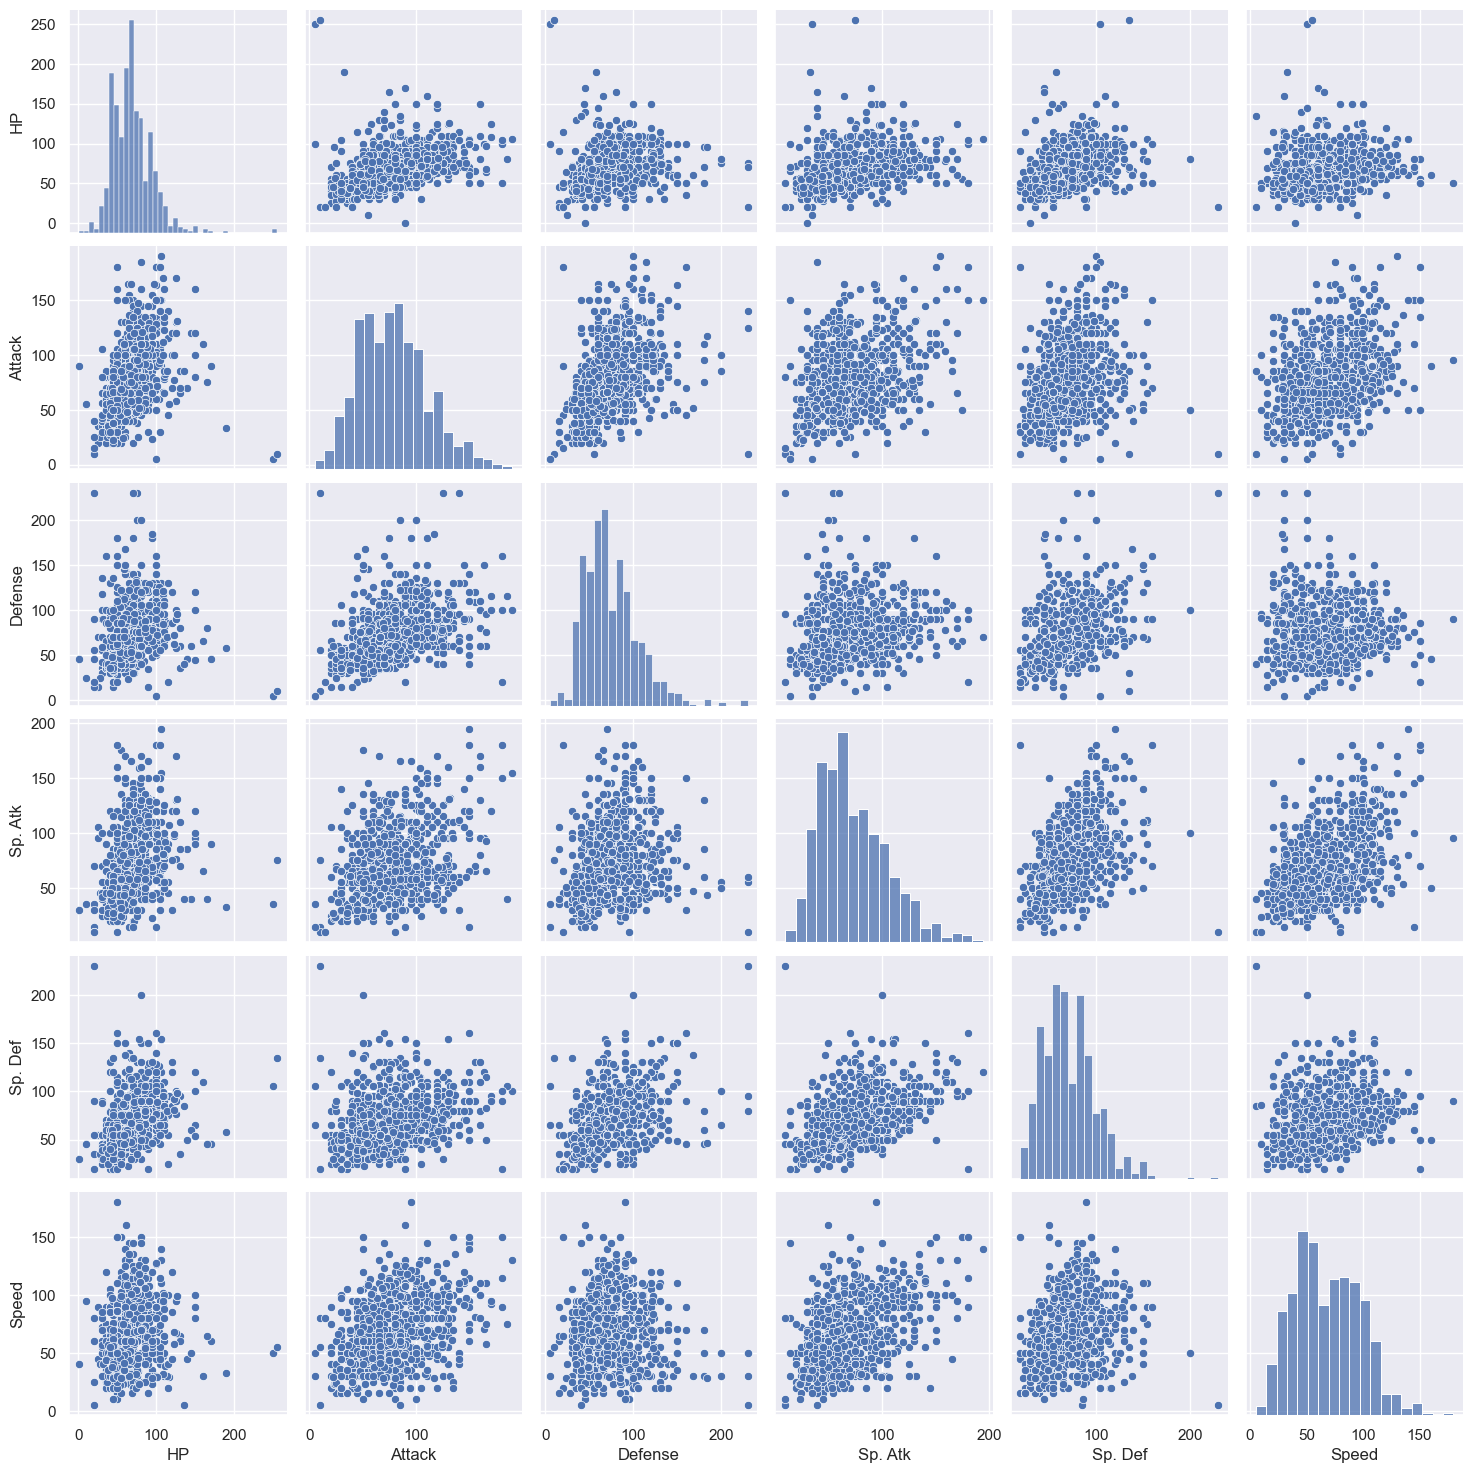

In [27]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)
"""
One line to create a matrix of plots 
    Diagonal: Univariate distribution of specific variable
    Off-Diagonal: Scatter lots between row and column variables
"""

What we achieved? Exploratory data analysis that we must do before we try to build an AI or Machine Learning model. We are getting to understand the data.

Think of this as an essential "health check" on the data. We transition from *guessing* about the data to *understanding* it.

### Uni-Variate Analysis ("Individual Variables")
Looking at variables in isolation. Understanding the "shape" and statistics of a single feature.
- **Boxplots**: Used to spot **Outliers** and visualize the Median and Interquartile Range (IQR)
- **Histograms/KDEs/Violins**: Used to check the **Distribution**. Is it a normal "bell curve", bimodal, skewed etc.

### Bi-Variate Analysis ("Relationship")
Quantifying how Feature X relates to Feature Y
- **Scatter Plots**: A visual check for raw patterns, clusters, or linear trends.
- **Correlation Matrix**: Transitions us from visual intuition to a precise mathematical score
- **Heatmaps**: Converts dense matrices of numbers into color-coded grids for instant readability

### Multi-Variate Analysis ("Big Picture")
Zooming out to see interactions across the entire dataset
- **Pairplots**: A grid of scatterplots that allows us to spot complex clusters and relationships across all variables simulatenously.